In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plot
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
tf.__version__

'1.3.0'

In [3]:
mnist = input_data.read_data_sets('data/MNIST/', one_hot=True)

Extracting data/MNIST/train-images-idx3-ubyte.gz
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


In [4]:
type(mnist.train)

tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet

In [5]:
mnist.test.images.shape[0]

10000

In [6]:
X_train = tf.placeholder(dtype=tf.float32,name='X_train')

Y_train = tf.placeholder(dtype=tf.float32,name='Y_train')

X_test = tf.placeholder(dtype=tf.float32,name='X_test')

Y_actual = np.asarray(mnist.test.labels,dtype=np.int16)

Y_predicted = np.zeros(shape=mnist.test.labels.shape,dtype=np.int16)

Y_indices = np.zeros(shape=[mnist.test.labels.shape[0],2],dtype=np.int16)

sub = tf.subtract(X_train-X_test,y=0,name='sub')

diff_sum = tf.reduce_sum(tf.abs(sub),1,name='diff_sum')

predicted = tf.argmin(diff_sum,axis=0,output_type=tf.int64,name='predicted')



In [7]:
with tf.Session() as sess:
    num_samples=mnist.test.images.shape[0]
    #writer = tf.SummaryWriter('./graphs/nn_classifier')
    
    for i in range(num_samples):
        sub1,diff,p =sess.run([sub,diff_sum,predicted],feed_dict={X_train:mnist.train.images,X_test:mnist.test.images[i]})
        Y_predicted[i] = mnist.train.labels[p]
        Y_indices[i]=[i,p]
    acc = np.mean( Y_predicted == Y_actual)  

In [8]:
Y_predicted

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int16)

In [9]:
acc

0.99231999999999998

In [10]:
t = Y_predicted != Y_actual

In [11]:
len(Y_actual[t])

768

In [12]:
Y_actual.shape

(10000, 10)

In [13]:
Y_actual_value=np.argmax(Y_actual,axis=1)
Y_predicted_value=np.argmax(Y_predicted,axis=1)

In [14]:
t = Y_predicted_value != Y_actual_value

In [15]:
Y_indices[t]

array([[    43, -32121],
       [    65, -15296],
       [   115,   3127],
       [   175, -28713],
       [   195, -23516],
       [   241,   4732],
       [   250, -31984],
       [   266,  15478],
       [   268, -22598],
       [   290,   9827],
       [   300, -21228],
       [   318,  31312],
       [   320,  28406],
       [   321, -20461],
       [   341,  29266],
       [   358,  14138],
       [   381, -19742],
       [   412,  13765],
       [   443, -30364],
       [   444, -13181],
       [   445,  19541],
       [   447,  19821],
       [   464,  31840],
       [   479,  21048],
       [   495,   3896],
       [   542, -21144],
       [   543,  31936],
       [   551,     90],
       [   565,  25977],
       [   578,  10343],
       [   582,  32610],
       [   583, -29368],
       [   628,  12562],
       [   646, -12794],
       [   684,  31324],
       [   717, -19624],
       [   726,  22248],
       [   740,   9842],
       [   774,  27676],
       [   787,  22518],


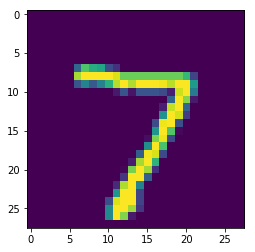

In [16]:
Y_actual_value[t][:10]
plot.imshow(mnist.test.images[0].reshape([28,28]))
plot.imshow(mnist.test.images[0].reshape([28,28]))
plot.show()

In [ ]:
Y_predicted_value[t][:10]